# PROJECT LAYOUT

#### The aim of this project is to predict the number of bikes that people may rent on an hourly basis using data collected over 2 years (2011-12).
#### The project uses simple Linear Regression modelling and reduces the error by Decision Tree Regression and Random Forest Regression.

#### The dataset contains columns mentioning season, month, hour, holidays, temperature, humidity, windspeed, etc.

# A. Reading in the Data

In [96]:
import pandas as pd
import numpy as np

bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Plotting a histogram to get an idea of distribution of count of rentals

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

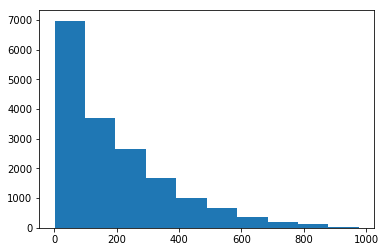

In [97]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(bike_rentals["cnt"])

In [98]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

#### Assigning hours labels to 4 different labels

In [99]:
## The hour labels can be replaced by categorizing them into four categories:
## early morning: 0 - 6 hours
## morning: 6 - 12 hours
## afternoon: 12 - 18 hours
## night: 18 - 24 hours

def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


#### Creating train and test dataframes

In [100]:
# Randomizing the dataset

X = np.random.permutation(bike_rentals.index)
bike_rentals = bike_rentals.reindex(X)

A = int(len(bike_rentals)*0.75)

train = bike_rentals[:A]
test = bike_rentals[A:]

# B. Training the Linear Regression model

In [101]:
from sklearn.linear_model import LinearRegression

cols = train.columns.drop(["cnt", "casual", "registered", "dteday"])

reg = LinearRegression()

reg.fit(train[cols], train["cnt"])

predictions = reg.predict(test[cols])

np.mean((predictions - test["cnt"]) ** 2)**0.5

133.96256248372214

### This is a very high root mean square error, considering from the graph above, which has a lot of values near the rmse value of 133!!

# C. Reducing the error by Decision Tree Regressor

In [102]:
from sklearn.tree import DecisionTreeRegressor

rmses = []

for i in range(2,6):
    reg = DecisionTreeRegressor(min_samples_leaf=i)
    
    reg.fit(train[cols], train["cnt"])
    
    predictions = reg.predict(test[cols])
    
    e = numpy.mean((predictions - test["cnt"]) ** 2)**0.5
    
    rmses.append(e)
    
rmses

[52.81690152125647, 49.58230419551317, 48.91048399255251, 48.148928827576874]

#### The best results are given by 6 leaves.

### Comparing with train predictions to check Overfitting

In [103]:
reg = DecisionTreeRegressor(min_samples_leaf=6)

reg.fit(train[cols], train["cnt"])

predictions = reg.predict(train[cols])

numpy.mean((predictions - train["cnt"]) ** 2)**0.5

34.81270208656236

#### While Decision Tree predictor has reduced the rmse considerably from linear regression model, the difference in train and test rmse is still around 12, which is quite high.

# D. Applying Random Forest Regressor

In [104]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=6)

reg.fit(train[cols], train["cnt"])

predictions = reg.predict(test[cols])

numpy.mean((predictions - test["cnt"]) ** 2)**0.5

42.84110758767053

#### Comparing with train predictions to check Overfitting

In [105]:
predictions = reg.predict(train[cols])

numpy.mean((predictions - train["cnt"]) ** 2)**0.5

35.31763330915551

#### The decision tree regressor was able to reduce the error by nearly 6, which now gives us a train and test rmse difference of around 7, which is much better than 12!

In [106]:
print(predictions)

[  5.66539456 267.29984127 179.43128862 ... 344.17136003   6.53156051
  51.091419  ]
